In [230]:
import os
import urllib.request 

import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

%matplotlib inline

In [231]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/"
OLYMPIC_PATH = os.path.join("dataset", "olympic teams")
OLYMPIC_URL = DOWNLOAD_ROOT + "/beginner_ml/teams.csv"

In [232]:
def fetch_olympic_data(olympic_url=OLYMPIC_URL, olympic_path=OLYMPIC_PATH):
    if not os.path.isdir(olympic_path):
        os.makedirs(olympic_path)

    csv_file = os.path.join(olympic_path, "teams.csv")
    urllib.request.urlretrieve(olympic_url, csv_file)

In [233]:
def load_olympic_data(olympic_path=OLYMPIC_PATH):
    csv_file = os.path.join(olympic_path, "teams.csv")
    print(csv_file)
    return pd.read_csv(csv_file)

In [234]:
fetch_olympic_data()

In [235]:
olympic = load_olympic_data()

dataset\olympic teams\teams.csv


## Take a Quick Look at the Data Structure

In [236]:
olympic.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [237]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [238]:
olympic.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


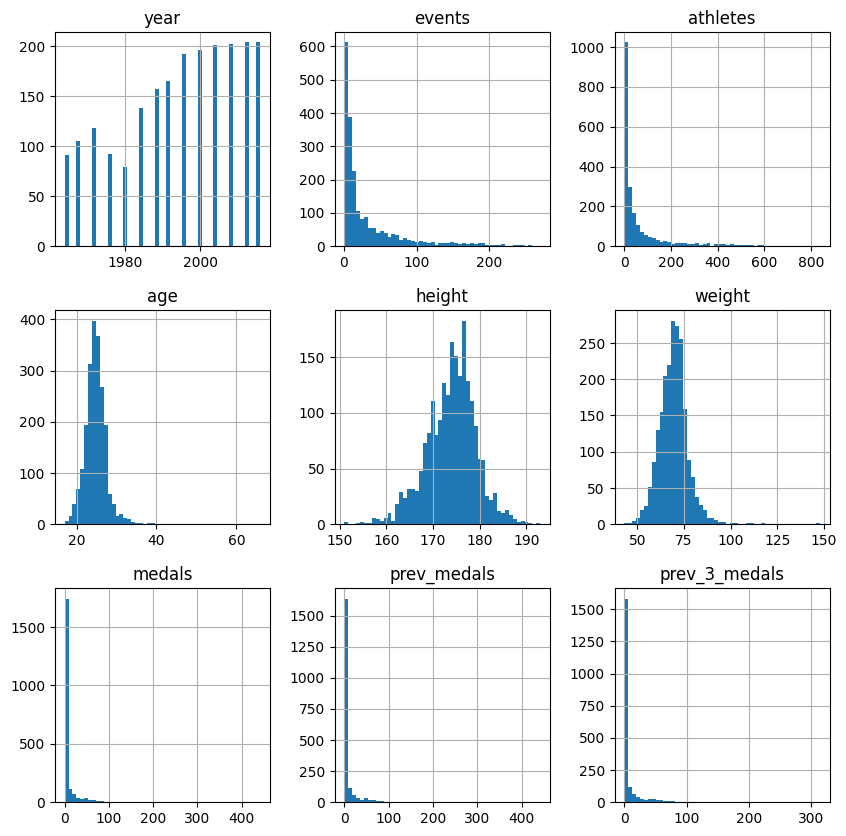

In [239]:
olympic.hist(bins=50 ,figsize=(10,10));

## Create a Test Set

In [240]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(olympic, random_state=46, test_size=0.2)

## Visualizing Data

In [241]:
olympic_train = train_data.copy()

In [242]:
olympic_train_corr = olympic_train.select_dtypes(include='number').corr()

In [243]:
olympic_train_corr['medals'].sort_values(ascending=False )

medals           1.000000
prev_medals      0.917955
prev_3_medals    0.908706
athletes         0.832732
events           0.766277
height           0.148557
weight           0.092980
age              0.030378
year            -0.013463
Name: medals, dtype: float64

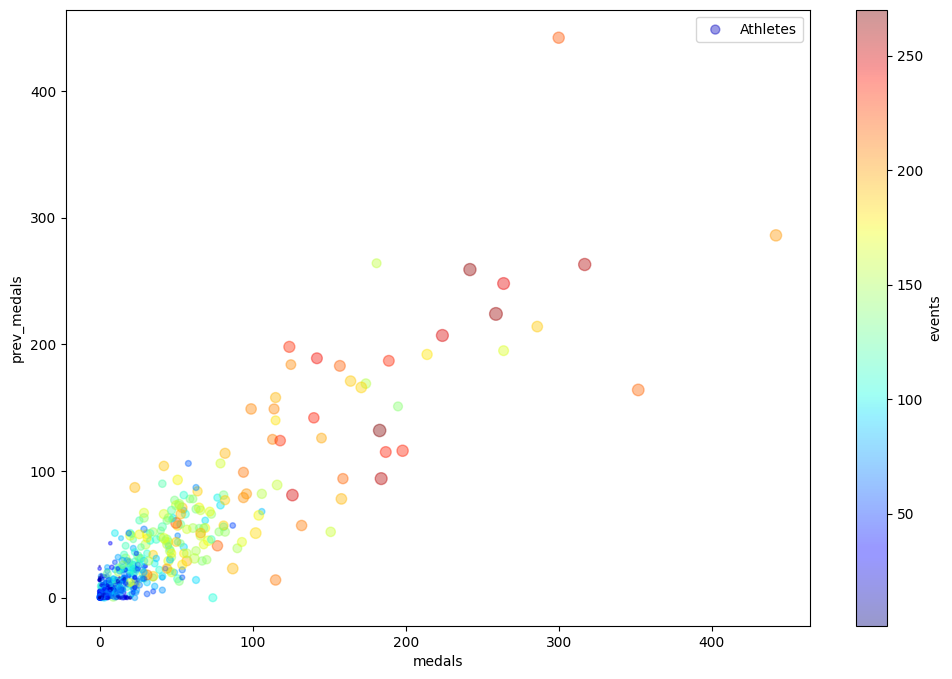

In [244]:
olympic_train.plot(kind="scatter", x='medals', y="prev_medals",s=olympic_train['athletes']/10,label='Athletes' ,c="events", cmap=plt.get_cmap("jet"), figsize=(12,8), alpha=0.4, colorbar=True)
plt.legend()

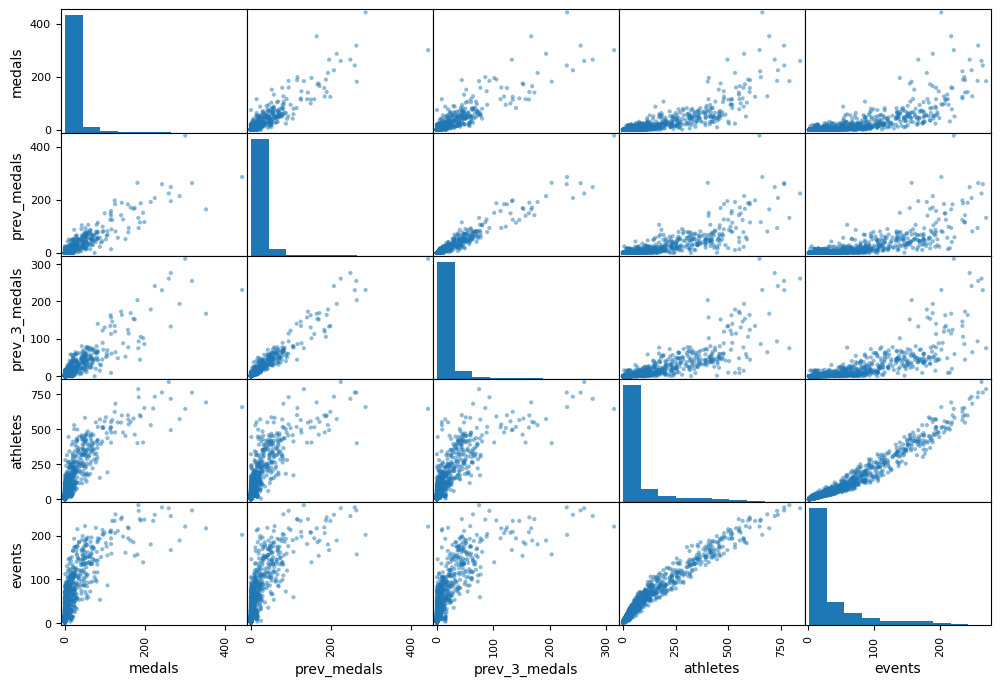

In [245]:
from pandas.plotting import scatter_matrix

attributes = ['medals', 'prev_medals','prev_3_medals', 'athletes', 'events']
scatter_matrix(olympic_train[attributes], figsize=(12, 8));

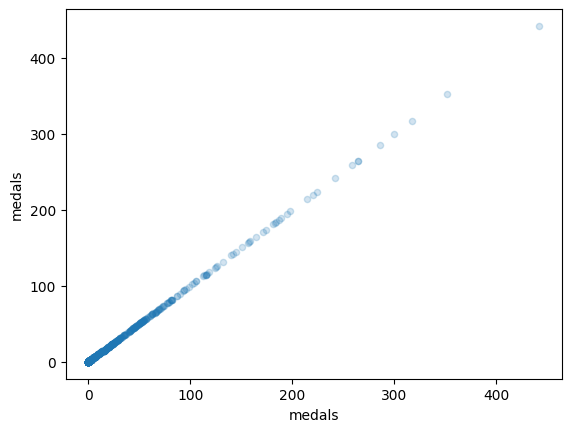

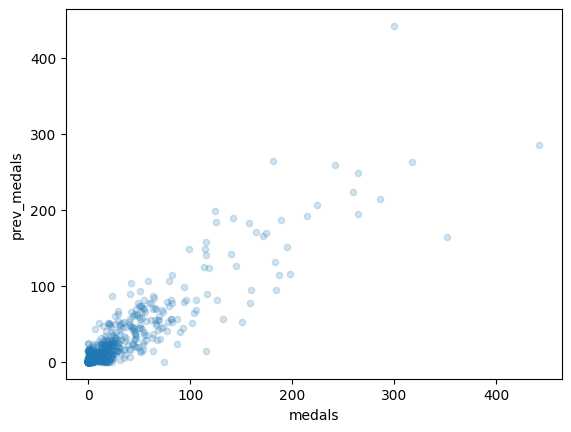

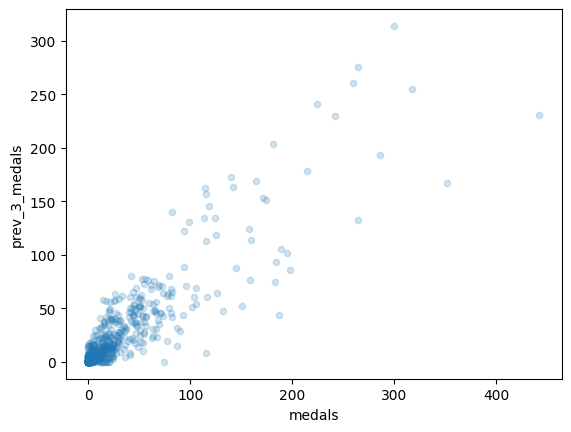

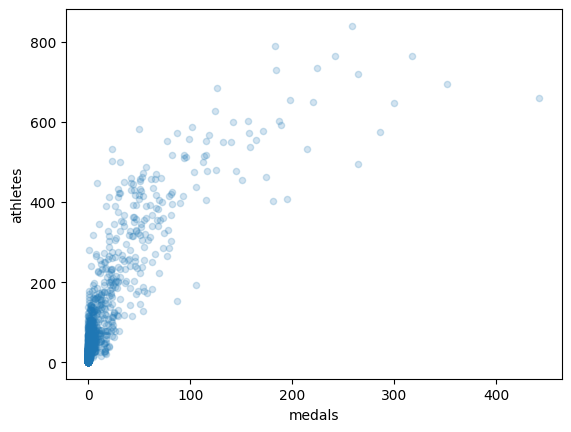

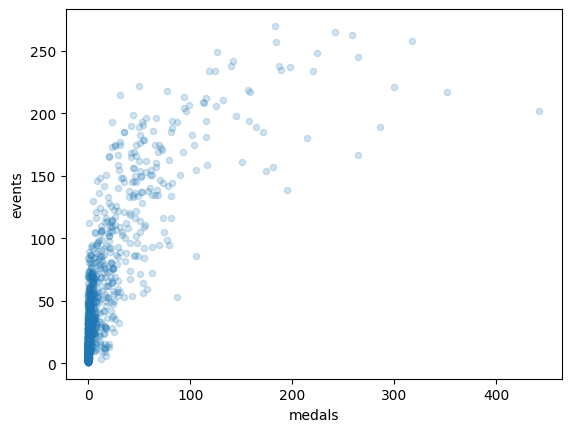

In [246]:
for attr in attributes:
    olympic_train.plot(kind='scatter', x='medals', y=attr , alpha=0.2)

In [247]:
olympic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1719 to 1576
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           1715 non-null   object 
 1   country        1715 non-null   object 
 2   year           1715 non-null   int64  
 3   events         1715 non-null   int64  
 4   athletes       1715 non-null   int64  
 5   age            1715 non-null   float64
 6   height         1715 non-null   float64
 7   weight         1715 non-null   float64
 8   medals         1715 non-null   int64  
 9   prev_medals    1618 non-null   float64
 10  prev_3_medals  1618 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 160.8+ KB


## Experimenting Attribute Combinations

In [248]:
olympic_train["BMI"] = olympic_train["weight"] / olympic_train["height"] / olympic_train["height"] * 1000

In [249]:
corr_matrix = olympic_train.select_dtypes(include='number').corr()
corr_matrix['medals'].sort_values(ascending=False)

medals           1.000000
prev_medals      0.917955
prev_3_medals    0.908706
athletes         0.832732
events           0.766277
height           0.148557
weight           0.092980
age              0.030378
BMI              0.017794
year            -0.013463
Name: medals, dtype: float64

In [250]:
olympic_train = olympic_train.drop('BMI', axis=1)
olympic_train

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
1719,SGP,Singapore-1,2004,16,22,24.6,170.1,64.0,0,0.0,0.0
528,DEN,Denmark,1972,73,155,26.3,180.6,75.0,1,17.0,17.3
2045,USA,United States,1976,189,554,23.0,177.3,71.0,164,171.0,168.7
518,CYP,Cyprus,2012,12,13,25.8,178.0,73.5,1,0.0,0.0
1226,MAR,Morocco,1976,9,9,25.2,173.2,62.2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
823,GUY,Guyana,1968,6,6,22.8,174.2,67.5,0,0.0,0.0
544,DJI,Djibouti,2000,2,2,25.0,164.0,55.0,0,0.0,0.3
1340,MON,Monaco,1976,6,10,36.3,174.7,75.6,0,0.0,0.0
658,FIN,Finland,1984,76,107,26.5,178.3,73.2,12,9.0,8.3


## Data Cleaning

In [295]:
olympic_train = train_data.drop('medals', axis=1).copy()
olympic_train_labels = train_data['medals'].copy()

In [296]:
olympic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1719 to 1576
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           1715 non-null   object 
 1   country        1715 non-null   object 
 2   year           1715 non-null   int64  
 3   events         1715 non-null   int64  
 4   athletes       1715 non-null   int64  
 5   age            1715 non-null   float64
 6   height         1715 non-null   float64
 7   weight         1715 non-null   float64
 8   prev_medals    1618 non-null   float64
 9   prev_3_medals  1618 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 211.9+ KB


In [297]:
olympic_num = olympic_train.drop(['country', 'team'], axis=1).copy()
olympic_num

,year,events,athletes,age,height,weight,prev_medals,prev_3_medals
1719,2004,16,22,24.6,170.1,64.0,0.0,0.0
528,1972,73,155,26.3,180.6,75.0,17.0,17.3
2045,1976,189,554,23.0,177.3,71.0,171.0,168.7
518,2012,12,13,25.8,178.0,73.5,0.0,0.0
1226,1976,9,9,25.2,173.2,62.2,0.0,0.0
...,...,...,...,...,...,...,...,...
823,1968,6,6,22.8,174.2,67.5,0.0,0.0
544,2000,2,2,25.0,164.0,55.0,0.0,0.3
1340,1976,6,10,36.3,174.7,75.6,0.0,0.0
658,1984,76,107,26.5,178.3,73.2,9.0,8.3


In [298]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ='median')
imputer.fit(olympic_num)
X = imputer.transform(olympic_num)

olympic_tr = pd.DataFrame(X, columns=olympic_num.columns)

In [302]:
olympic_tr

,year,events,athletes,age,height,weight,prev_medals,prev_3_medals
0,2004.0,16.0,22.0,24.6,170.1,64.0,0.0,0.0
1,1972.0,73.0,155.0,26.3,180.6,75.0,17.0,17.3
2,1976.0,189.0,554.0,23.0,177.3,71.0,171.0,168.7
3,2012.0,12.0,13.0,25.8,178.0,73.5,0.0,0.0
4,1976.0,9.0,9.0,25.2,173.2,62.2,0.0,0.0
...,...,...,...,...,...,...,...,...
1710,1968.0,6.0,6.0,22.8,174.2,67.5,0.0,0.0
1711,2000.0,2.0,2.0,25.0,164.0,55.0,0.0,0.3
1712,1976.0,6.0,10.0,36.3,174.7,75.6,0.0,0.0
1713,1984.0,76.0,107.0,26.5,178.3,73.2,9.0,8.3


In [314]:
olympic_cat = olympic_train[['country', 'team']].copy()
olympic_cat.reset_index(inplace=True)
olympic_cat.drop(['index'], axis=1, inplace=True)
olympic_cat

,country,team
0,Singapore-1,SGP
1,Denmark,DEN
2,United States,USA
3,Cyprus,CYP
4,Morocco,MAR
...,...,...
1710,Guyana,GUY
1711,Djibouti,DJI
1712,Monaco,MON
1713,Finland,FIN


In [315]:
olympic_cat_num = pd.merge(olympic_cat, olympic_tr, left_index=True, right_index=True)

In [319]:
## TODO: join categories and num attribute for meantime to find solution on OneHotEncoder
olympic_cat_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1715 non-null   object 
 1   team           1715 non-null   object 
 2   year           1715 non-null   float64
 3   events         1715 non-null   float64
 4   athletes       1715 non-null   float64
 5   age            1715 non-null   float64
 6   height         1715 non-null   float64
 7   weight         1715 non-null   float64
 8   prev_medals    1715 non-null   float64
 9   prev_3_medals  1715 non-null   float64
dtypes: float64(8), object(2)
memory usage: 134.1+ KB


In [321]:
olympic_cat_num

,country,team,year,events,athletes,age,height,weight,prev_medals,prev_3_medals
0,Singapore-1,SGP,2004.0,16.0,22.0,24.6,170.1,64.0,0.0,0.0
1,Denmark,DEN,1972.0,73.0,155.0,26.3,180.6,75.0,17.0,17.3
2,United States,USA,1976.0,189.0,554.0,23.0,177.3,71.0,171.0,168.7
3,Cyprus,CYP,2012.0,12.0,13.0,25.8,178.0,73.5,0.0,0.0
4,Morocco,MAR,1976.0,9.0,9.0,25.2,173.2,62.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1710,Guyana,GUY,1968.0,6.0,6.0,22.8,174.2,67.5,0.0,0.0
1711,Djibouti,DJI,2000.0,2.0,2.0,25.0,164.0,55.0,0.0,0.3
1712,Monaco,MON,1976.0,6.0,10.0,36.3,174.7,75.6,0.0,0.0
1713,Finland,FIN,1984.0,76.0,107.0,26.5,178.3,73.2,9.0,8.3


In [257]:
olympic_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1719 to 1576
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1715 non-null   object
 1   team     1715 non-null   object
dtypes: object(2)
memory usage: 40.2+ KB


In [258]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
olympic_cat_1hot = cat_encoder.fit_transform(olympic_cat[['country', 'team']]).toarray()

In [259]:
olympic_cat_1hot_labels = cat_encoder.categories_

In [260]:
olympic_cat_1hot_labels

[array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
        'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Australia-1', 'Australia-2', 'Austria', 'Azerbaijan',
        'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
        'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
        'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
        'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Canada-2',
        'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
        'Chile', 'China', 'Chinese Taipei', 'Colombia', 'Comoros',
        'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cook Islands',
        'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
        'Czech Republic', 'Czechoslovakia', 'Denmark', 'Digby', 'Djibouti',
        'Dominica', 'Dominican Republic', 'East Germany', 'Ecuador',
        'Egypt', 'El Sa

In [261]:
olympic_cat_1hot_labels = np.array(olympic_cat_1hot_labels,  dtype="object").ravel() 

In [262]:
## Cant concatinate change OneHotEncoder in the future for more good process for category

### Training and Evaluating on the Training Set


In [397]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(olympic_cat_num[olympic_num.columns], olympic_train_labels)

LinearRegression()

In [398]:
from sklearn.impute import SimpleImputer

test_data_predictor = test_data.drop(["country", "medals", "team"], axis=1).copy()

imputer = SimpleImputer(strategy ='median')
imputer.fit(test_data_predictor)
X = imputer.transform(test_data_predictor)

test_data_num = pd.DataFrame(X, columns=test_data_predictor.columns)

In [399]:
test_data_cat = test_data[['country', 'team']].copy()
test_data_cat.reset_index(inplace=True)
test_data_cat.drop(['index'], axis=1, inplace=True)
test_data_cat

,country,team
0,British Virgin Islands,IVB
1,Fiji,FIJ
2,Poland,POL
3,Qatar,QAT
4,Ecuador,ECU
...,...,...
424,Gabon,GAB
425,Central African Republic,CAF
426,Burkina Faso,BUR
427,Gabon,GAB


In [400]:
test_cat_num = pd.merge(test_data_cat, test_data_num, left_index=True, right_index=True)

In [401]:
test_data_label = test_data["medals"].copy()

In [402]:
from sklearn.metrics import root_mean_squared_error

olympic_prediction = lin_reg.predict(test_cat_num[olympic_num.columns])
lin_rmse = root_mean_squared_error(test_data_label, olympic_prediction)
lin_rmse

np.float64(8.339823677481473)

In [403]:
test_data_label = test_data_label.to_frame()

In [405]:
test_data_label.reset_index(inplace=True)

In [406]:
test_data_label.drop(['index',],axis=1, inplace=True)
test_data_label

,medals
0,0
1,0
2,24
3,0
4,0
...,...
424,0
425,0
426,0
427,0


In [407]:
test_cat_num = pd.merge(test_cat_num, test_data_label, left_index=True, right_index=True)
test_cat_num["predictions"] = olympic_prediction
test_cat_num["predictions"] = test_cat_num["predictions"].round()
test_cat_num.loc[test_cat_num["predictions"] <= 0] = 0

In [408]:
test_cat_num['team'].value_counts()

team
0      204
MEX      5
USA      5
JPN      4
SUI      4
      ... 
ANT      1
DMA      1
URS      1
GAM      1
CAF      1
Name: count, Length: 133, dtype: int64

In [409]:
test_cat_num[test_cat_num['team'] == 'USA']

,country,team,year,events,athletes,age,height,weight,prev_medals,prev_3_medals,medals,predictions
28,United States,USA,2004.0,254.0,726.0,26.5,177.0,73.6,242.0,241.7,263,243.0
152,United States,USA,1964.0,159.0,492.0,23.5,177.2,71.8,125.0,127.3,169,143.0
153,United States,USA,1968.0,167.0,529.0,23.5,177.2,72.1,169.0,139.0,166,173.0
254,United States,USA,2012.0,245.0,689.0,26.7,178.3,74.7,317.0,274.0,248,283.0
371,United States,USA,1988.0,230.0,715.0,25.2,177.1,71.4,352.0,229.0,207,304.0


In [411]:
test_cat_num[test_cat_num['team'] == 'JPN']

,country,team,year,events,athletes,age,height,weight,prev_medals,prev_3_medals,medals,predictions
15,Japan,JPN,1972.0,113.0,293.0,24.2,169.1,64.9,63.0,52.0,56,66.0
29,Japan,JPN,1984.0,147.0,365.0,23.5,169.4,64.1,41.0,53.3,49,59.0
187,Japan,JPN,1968.0,97.0,289.0,23.5,168.2,63.8,62.0,39.0,63,69.0
405,Japan,JPN,2012.0,178.0,399.0,25.1,168.5,62.8,51.0,62.7,84,62.0


In [414]:
lin_error_medals = (test_cat_num['medals'] - test_cat_num["predictions"]).abs()
lin_error_medals

0      2.0
1      1.0
2      4.0
3      0.0
4      0.0
      ... 
424    0.0
425    1.0
426    0.0
427    0.0
428    0.0
Length: 429, dtype: float64

In [415]:
lin_error_by_team = lin_error_medals.groupby(test_cat_num["team"]).mean()
medals_by_team = test_cat_num["medals"].groupby(test_cat_num["team"]).mean()
lin_error_ratio = lin_error_by_team/medals_by_team

In [416]:
lin_error_ratio[~pd.isnull(lin_error_ratio)]

team
AHO    1.000000
ANG         inf
ANT         inf
ARG    0.600000
ARU         inf
         ...   
USA    0.175689
VAN         inf
YEM         inf
YUG    0.583333
ZIM         inf
Length: 132, dtype: float64

In [418]:
lin_error_ratio = lin_error_ratio[np.isfinite(lin_error_ratio)]
lin_error_ratio

team
AHO    1.000000
ARG    0.600000
AUS    0.148148
BAH    0.294118
BEL    0.900000
         ...   
TPE    1.285714
TUR    0.600000
URS    0.119792
USA    0.175689
YUG    0.583333
Length: 61, dtype: float64

<Axes: ylabel='Frequency'>

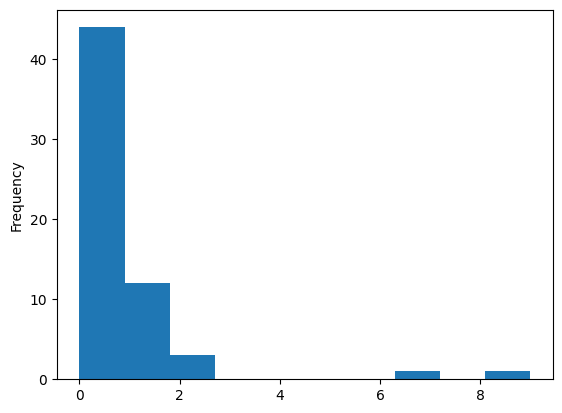

In [419]:
lin_error_ratio.plot.hist()

In [422]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(olympic_cat_num[olympic_num.columns], olympic_train_labels)

c:\Users\CLIENT\Desktop\New folder (2)\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [423]:
olympic_pred_log = log_reg.predict(test_cat_num[olympic_num.columns])
log_rmse = root_mean_squared_error(test_data_label, olympic_pred_log)
log_rmse

np.float64(9.871552686763742)